In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests
from config import weather_api_key
from citipy import citipy 

%matplotlib inline

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000 , high = 90.000 , size = 1500)
lngs = np.random.uniform(low =-180.000 , high = 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

599

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jalu
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | yeppoon
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 1 | raga
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | stawell
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | kolding
Processing Record 21 of Set 1 | mumbwa
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set

Processing Record 37 of Set 4 | kiruna
Processing Record 38 of Set 4 | abu dhabi
Processing Record 39 of Set 4 | digha
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | turbat
Processing Record 43 of Set 4 | hun
Processing Record 44 of Set 4 | xiaoweizhai
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | karratha
Processing Record 47 of Set 4 | jiuquan
Processing Record 48 of Set 4 | eidfjord
Processing Record 49 of Set 4 | strezhevoy
Processing Record 50 of Set 4 | kyren
Processing Record 1 of Set 5 | donskoye
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | karkaralinsk
City not found. Skipping...
Processing Record 5 of Set 5 | marang
Processing Record 6 of Set 5 | ternate
Processing Record 7 of Set 5 | halalo
City not found. Skipping...
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | aklavik
Processing Record 10 of Set 5 |

Processing Record 26 of Set 8 | jumla
Processing Record 27 of Set 8 | mrirt
City not found. Skipping...
Processing Record 28 of Set 8 | nador
Processing Record 29 of Set 8 | kapuskasing
Processing Record 30 of Set 8 | grafton
Processing Record 31 of Set 8 | muli
Processing Record 32 of Set 8 | sao joao da barra
Processing Record 33 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 34 of Set 8 | ambulu
Processing Record 35 of Set 8 | mandali
Processing Record 36 of Set 8 | gornozavodsk
Processing Record 37 of Set 8 | mogok
Processing Record 38 of Set 8 | amapa
Processing Record 39 of Set 8 | korla
Processing Record 40 of Set 8 | todos santos
Processing Record 41 of Set 8 | cherskiy
Processing Record 42 of Set 8 | kungurtug
Processing Record 43 of Set 8 | pimentel
Processing Record 44 of Set 8 | ardistan
City not found. Skipping...
Processing Record 45 of Set 8 | huarmey
Processing Record 46 of Set 8 | grand haven
Processing Record 47 of Set 8 | boa vista
Processing Re

Processing Record 12 of Set 12 | iracoubo
Processing Record 13 of Set 12 | umea
Processing Record 14 of Set 12 | baft
Processing Record 15 of Set 12 | catuday
Processing Record 16 of Set 12 | morada nova
Processing Record 17 of Set 12 | emerald
Processing Record 18 of Set 12 | saint-leu
Processing Record 19 of Set 12 | kishi
Processing Record 20 of Set 12 | grebenskaya
Processing Record 21 of Set 12 | ilebo
Processing Record 22 of Set 12 | wajir
Processing Record 23 of Set 12 | ust-kuyga
Processing Record 24 of Set 12 | umm kaddadah
Processing Record 25 of Set 12 | waingapu
Processing Record 26 of Set 12 | bababe
City not found. Skipping...
Processing Record 27 of Set 12 | zhigansk
Processing Record 28 of Set 12 | utiroa
City not found. Skipping...
Processing Record 29 of Set 12 | tabulbah
City not found. Skipping...
Processing Record 30 of Set 12 | dennery
Processing Record 31 of Set 12 | pionerskiy
Processing Record 32 of Set 12 | copiapo
Processing Record 33 of Set 12 | mezen
Proces

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jalu,29.0331,21.5482,66.87,49,0,4.12,LY,2021-10-31 00:27:42
1,Tiksi,71.6872,128.8694,3.56,91,98,9.51,RU,2021-10-31 00:27:42
2,Hermanus,-34.4187,19.2345,60.91,89,42,8.55,ZA,2021-10-31 00:27:43
3,Yeppoon,-23.1333,150.7333,83.98,63,25,8.30,AU,2021-10-31 00:27:43
4,Avarua,-21.2078,-159.7750,78.85,53,94,13.80,CK,2021-10-31 00:26:16


In [8]:
new_column_order =['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jalu,LY,2021-10-31 00:27:42,29.0331,21.5482,66.87,49,0,4.12
1,Tiksi,RU,2021-10-31 00:27:42,71.6872,128.8694,3.56,91,98,9.51
2,Hermanus,ZA,2021-10-31 00:27:43,-34.4187,19.2345,60.91,89,42,8.55
3,Yeppoon,AU,2021-10-31 00:27:43,-23.1333,150.7333,83.98,63,25,8.30
4,Avarua,CK,2021-10-31 00:26:16,-21.2078,-159.7750,78.85,53,94,13.80


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

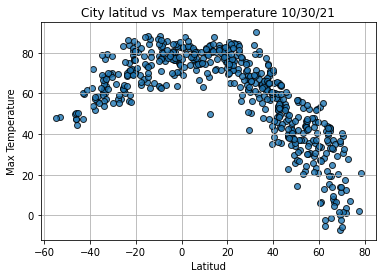

In [11]:
import time

plt.scatter(lats, max_temps, edgecolor='black',linewidths = 1, marker='o', alpha = 0.8, label = "Cities")


plt.title(f"City latitud vs  Max temperature " + time.strftime('%x'))
plt.xlabel('Latitud')
plt.ylabel('Max Temperature')
plt.grid(True)
plt.savefig('weather_data/Fig1.png')


plt.show()

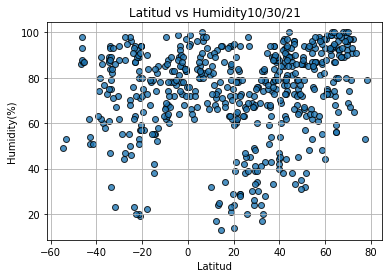

In [12]:
plt.scatter(lats ,humidity, edgecolor = 'black', linewidths = 1, marker = 'o', alpha =0.8, label = "Cities")

plt.title(f'Latitud vs Humidity' +time.strftime('%x') )
plt.xlabel("Latitud")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.savefig('weather_data/Fig2.png')
plt.show()

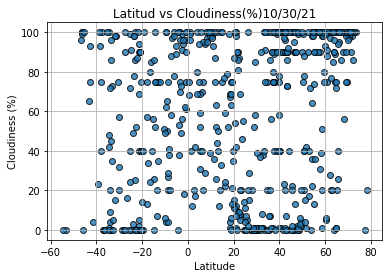

In [13]:
plt.scatter(lats, cloudiness, edgecolor = "black", linewidth = 1, marker = 'o', alpha = 0.8, label = "Cities")
plt.title(f'Latitud vs Cloudiness(%)' + time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

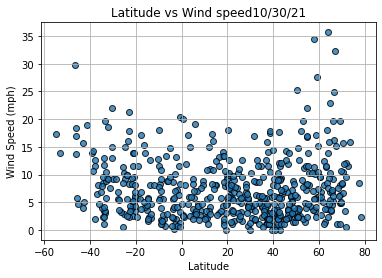

In [14]:
plt.scatter(lats,wind_speed, edgecolor = 'black', linewidth = 1 , marker = 'o', alpha = 0.8, label = 'Cities' )

plt.title(f'Latitude vs Wind speed' + time.strftime('%x'))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13 

City                       Torbay
Country                        CA
Date          2021-10-31 00:27:47
Lat                       47.6666
Lng                      -52.7314
Max Temp                    39.27
Humidity                       79
Cloudiness                      1
Wind Speed                   3.44
Name: 13, dtype: object

In [18]:
city_data_df['Lat']>= 0 

0       True
1       True
2      False
3      False
4      False
       ...  
539     True
540     True
541    False
542    False
543    False
Name: Lat, Length: 544, dtype: bool

In [19]:
city_data_df.loc[(city_data_df['Lat']>= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jalu,LY,2021-10-31 00:27:42,29.0331,21.5482,66.87,49,0,4.12
1,Tiksi,RU,2021-10-31 00:27:42,71.6872,128.8694,3.56,91,98,9.51
8,Kapaa,US,2021-10-31 00:24:43,22.0752,-159.3190,82.38,79,90,5.75
9,Albany,US,2021-10-31 00:27:45,42.6001,-73.9662,56.75,93,96,2.48
12,Raga,SS,2021-10-31 00:27:47,8.4596,25.6780,74.88,69,97,3.49
...,...,...,...,...,...,...,...,...,...
532,Tilichiki,RU,2021-10-31 00:31:47,60.4667,166.1000,6.21,88,6,9.62
535,Taoudenni,ML,2021-10-31 00:31:48,22.6783,-3.9836,82.24,28,69,9.75
538,Nishihara,JP,2021-10-31 00:31:50,26.1842,127.7558,78.08,69,20,5.75
539,Killybegs,IE,2021-10-31 00:31:14,54.6333,-8.4500,47.44,85,100,21.92


In [20]:
city_data_df.loc[(city_data_df['Lat']>= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jalu,LY,2021-10-31 00:27:42,29.0331,21.5482,66.87,49,0,4.12
1,Tiksi,RU,2021-10-31 00:27:42,71.6872,128.8694,3.56,91,98,9.51
8,Kapaa,US,2021-10-31 00:24:43,22.0752,-159.3190,82.38,79,90,5.75
9,Albany,US,2021-10-31 00:27:45,42.6001,-73.9662,56.75,93,96,2.48
12,Raga,SS,2021-10-31 00:27:47,8.4596,25.6780,74.88,69,97,3.49


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

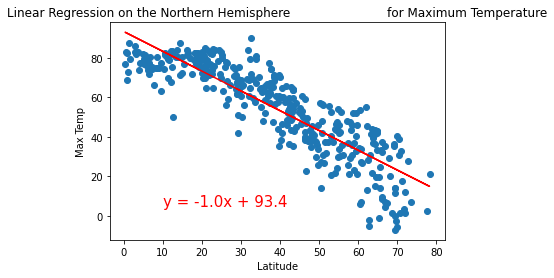

In [39]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature',"Max Temp",(10,5))
plt.show()

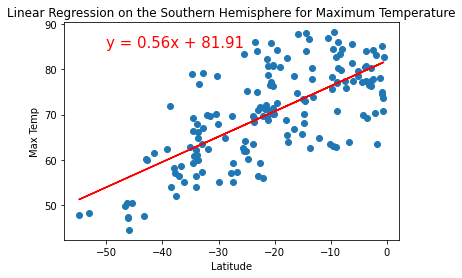

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,85))

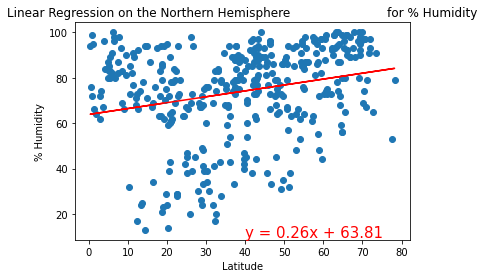

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

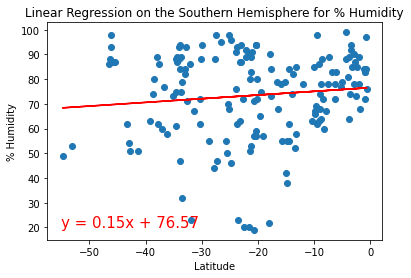

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,20))

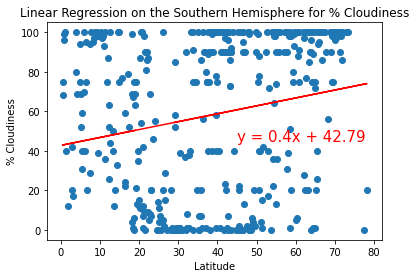

In [56]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(45,45))

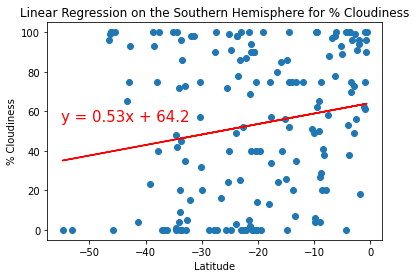

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,55))

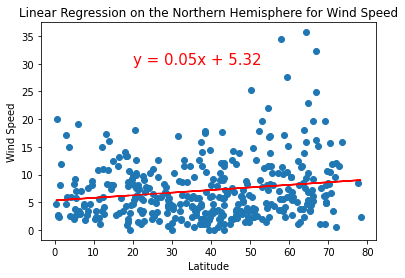

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(20,30))

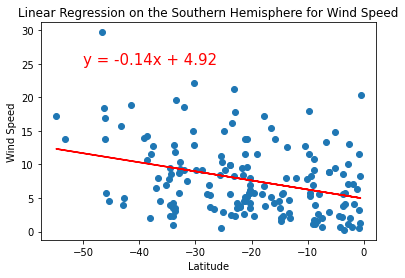

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))